In [1]:
import SanquinPackageModule as spm
from tabulate import tabulate
from IPython.display import HTML, display
import ipywidgets as widgets
%matplotlib inline
WSP = "data/Test_WorkspaceAnalysis_wsp_file.wsp"
Samples = "data/FCS_files"

workspace = spm.WorkspaceAnalysis.Workspace(wsp_file=WSP, samples_directory=Samples, ignore_missing_samples=True, find_fcs_files=False, main_gate=None)

In [2]:
data = []
for x in workspace.gate_ids:
    data.append(x[0])
main_gate = widgets.Dropdown(options=data, description='Gate', disabled=False)
display(main_gate)

Dropdown(description='Gate', options=('Lymphocytes', 'Live', 'Single Cells', 'CD8+', 'CD27+', 'CD39+', 'LAG3+'…

In [3]:
workspace = spm.WorkspaceAnalysis.Workspace(wsp_file=WSP, samples_directory=Samples, ignore_missing_samples=True, find_fcs_files=False, main_gate=main_gate.value)
key_list = sorted(list(workspace.keywords.keys()))
key_list = [x for x in key_list if x.startswith("$") == False]
keys = [widgets.Checkbox(value=False, description=w) for w in key_list]
key_widget = widgets.GridBox(keys, layout=widgets.Layout(grid_template_rows="repeat(25, 30px)", grid_template_columns="repeat(10, 300px)",grid_auto_flow="column"))
display(key_widget)

GridBox(children=(Checkbox(value=False, description='APPLY COMPENSATION'), Checkbox(value=False, description='…

In [28]:
keywords_to_use = []
for x in keys:
    if x.value == True:
        keywords_to_use.append(x.description)

For making a dotplot use:

In [5]:
sample_list = workspace.sample_overview(keywords=keywords_to_use)
sample_choosing = [widgets.Checkbox(value=False, description=' - '.join(w.to_list()), layout=widgets.Layout(width='100%')) for i, w in sample_list.iterrows()]
s_widget = widgets.GridBox(sample_choosing)
display(s_widget)

GridBox(children=(Checkbox(value=False, description='20240916__001_001.fcs - 4017 - Multi', layout=Layout(widt…

In [6]:
x_widget = widgets.Dropdown(options=workspace.channels, description="x-axis value", disabled=False, layout=widgets.Layout(width="400px"))
y_widget = widgets.Dropdown(options=workspace.channels, description="y-axis value", disabled=False, layout=widgets.Layout(width="400px"))
display(x_widget)
display(y_widget)

Dropdown(description='x-axis value', layout=Layout(width='400px'), options=('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A'…

Dropdown(description='y-axis value', layout=Layout(width='400px'), options=('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A'…

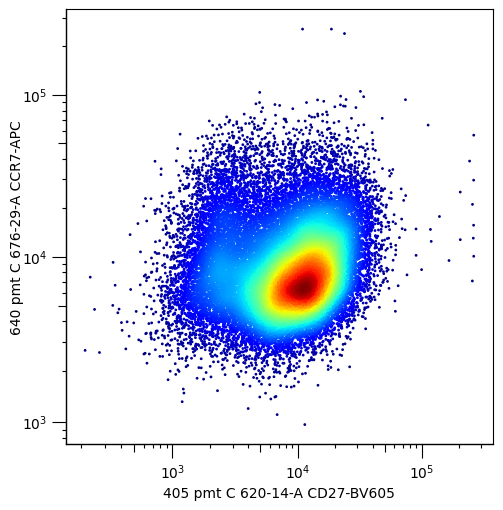

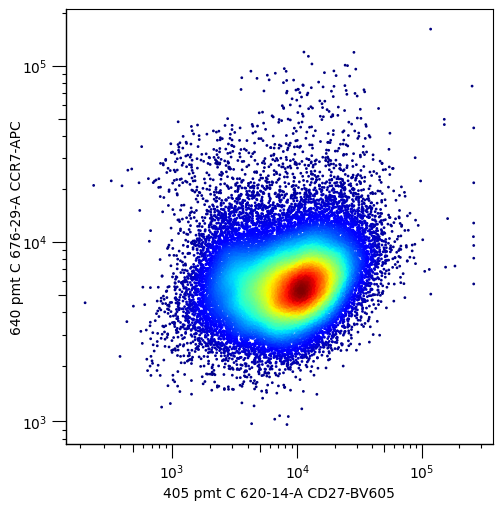

In [8]:
samples_to_use = []
for x in sample_choosing:
    if x.value == True:
        samples_to_use.append(x.description)
for x in samples_to_use:
    sample_id = x.split()[0]
    data = workspace.events_per_sample(sample_ID=sample_id, channels="All", data_source="comp")
    spm.Graphs.dotplot(data, x_widget.value, y_widget.value)

For making a histogram:

In [9]:
sample_list = workspace.sample_overview(keywords=keywords_to_use)
sample_choosing = [widgets.Checkbox(value=False, description=' - '.join(w.to_list()), layout=widgets.Layout(width='100%')) for i, w in sample_list.iterrows()]
s_widget = widgets.GridBox(sample_choosing)
display(s_widget)

x_widget = widgets.Dropdown(options=workspace.channels, description="x-axis value", disabled=False, layout=widgets.Layout(width="400px"))
display(x_widget)

number_plots_widgets = widgets.Dropdown(options=["Separate", "Together"], description="Histograms in a seperate or a single graph", disabled=False, layout=widgets.Layout(width="400px"))
display(number_plots_widgets)

GridBox(children=(Checkbox(value=False, description='20240916__001_001.fcs - 4017 - Multi', layout=Layout(widt…

Dropdown(description='x-axis value', layout=Layout(width='400px'), options=('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A'…

Dropdown(description='Histograms in a seperate or a single graph', layout=Layout(width='400px'), options=('Sep…

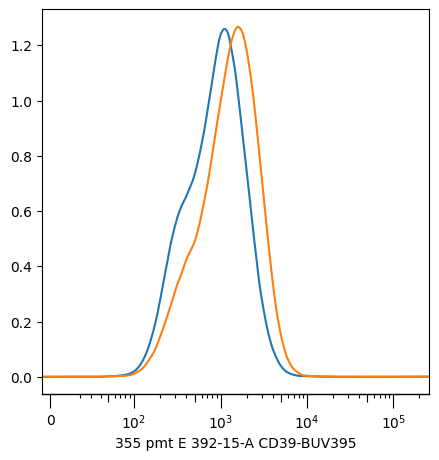

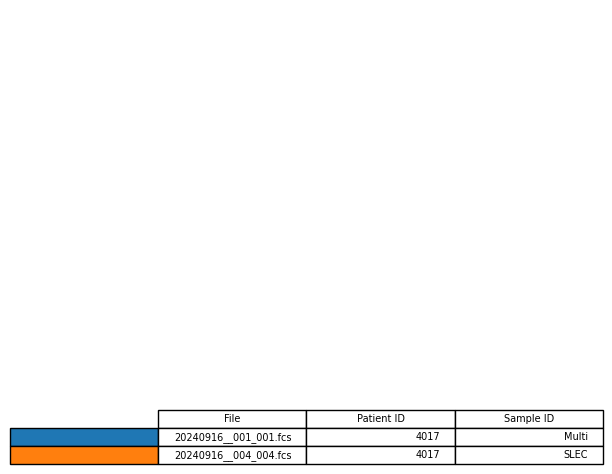

In [16]:
samples_to_use = []
for x in sample_choosing:
    if x.value == True:
        samples_to_use.append((x.description).split()[0])
if number_plots_widgets.value == "Together":
    data = workspace.events_per_channel(channel=x_widget.value, samples=samples_to_use)
    if len(samples_to_use) > 1:
        legend = True
        legend_data = workspace.sample_overview(keywords=keywords_to_use)
    else:
        legend = False
        legend_data=None
    spm.Graphs.histogram(data, legend=legend, xaxis_label=x_widget.value, legend_data=legend_data)

if number_plots_widgets.value == "Separate":
    for x in samples_to_use:
        data = workspace.events_per_channel(channel=x_widget.value, samples=[x])
        spm.Graphs.histogram(data, xaxis_label=x_widget.value)

For making boxplot

In [37]:
y_widget = widgets.Dropdown(options=workspace.channels, description="y-axis value", disabled=False, layout=widgets.Layout(width="400px"))
display(y_widget)

x_widget = widgets.Dropdown(options=keywords_to_use, description="x-axis variable", disabled=False, layout=widgets.Layout(width="400px"))
display(x_widget)

Dropdown(description='y-axis value', layout=Layout(width='400px'), options=('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A'…

Dropdown(description='x-axis variable', layout=Layout(width='400px'), options=('PATIENT ID', 'SAMPLE ID'), val…

In [38]:
leftover_keywords = [x for x in keywords_to_use if x != x_widget.value]
g_widget = widgets.Dropdown(options=leftover_keywords, description="grouping variable", disabled=False, layout=widgets.Layout(width="400px"))
display(g_widget)

l_widget = widgets.Checkbox(value=False, description='Legend', layout=widgets.Layout(width='100%'))
display(l_widget)

Dropdown(description='grouping variable', layout=Layout(width='400px'), options=('PATIENT ID',), value='PATIEN…

Checkbox(value=False, description='Legend', layout=Layout(width='100%'))

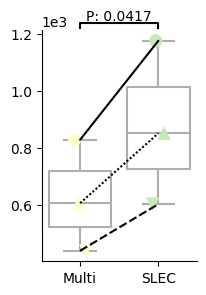

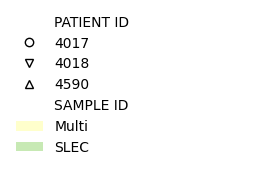

In [41]:
data = workspace.gmfi(keywords=keywords_to_use)
spm.Graphs.boxplot(data, xvariable=x_widget.value, yvalue= y_widget.value, group=g_widget.value, legend=l_widget.value)